Calcula parametros de grupo SIODOC

In [89]:
import sys
import numpy as np
import pandas as pd
import scipy.io
from datetime import datetime
from importlib import reload
import warnings
sys.path.append('/home/hp/git/ocean-wave')
import buoys
import waveproc
# import wavegroup
import wavespread
import waveplot
import matplotlib.pyplot as plt
reload(buoys)
reload(waveproc)
# reload(wavegroup)
reload(wavespread)
reload(waveplot)

<module 'waveplot' from '/home/hp/git/ocean-wave/waveplot.py'>

In [66]:
heave_mat = scipy.io.loadmat('./dados/heave.mat')

#  0    1    2    3     4    5  
# ano, mes, dia, hora, min, seg
data1 = heave_mat['heave'][:,[0,1,2,3,4,5]]
data2 = [datetime(int(data1[i,0]),int(data1[i,1]),int(data1[i,2]),
         int(data1[i,3])) for i in range(len(data1))]

mat_n1 = pd.DataFrame(heave_mat['heave'][:,6:], index=data2)
mat_n1.index.name = 'date'
mat_n1.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
date,,,,,,,,,,,,,,,,,,,,,
2014-07-16 16:00:00,-0.2344,0.0000,0.0781,0.0781,0.0781,0.1563,0.1563,0.0781,-0.2344,-0.4688,...,0.0000,0.3125,0.2344,-0.0781,-0.3906,-0.3125,0.0000,0.4688,0.4688,0.0781
2014-07-16 17:00:00,0.0000,0.0781,-0.1563,-0.0781,-0.3125,0.0000,0.3906,0.4688,0.3125,-0.4688,...,-0.3125,-0.1563,0.3125,0.3125,0.0000,-0.0781,-0.2344,0.0781,0.1563,0.0781
2014-07-16 18:00:00,0.0781,0.6250,0.7031,0.3125,-0.3125,-0.7031,-0.2344,0.1563,0.3125,0.0000,...,0.7813,0.4688,0.0781,-0.1563,-0.3125,-0.3125,-0.0781,-0.1563,-0.2344,0.0781


In [96]:
# plotagem das series temporais

for i in range(len(mat_n1)):
    n1 = mat_n1.iloc[i, :]

    datet = mat_n1.index[i]

    cc, pp, tt = waveproc.waveproc(t=n1.index.values,
                                    s1=n1.values,
                                    s2=[],
                                    s3=[],
                                    Fs=1.0, NFFT=128)

    fig = waveplot.serie_espectro(t=n1.index,
                                  heave=n1.values,
                                  freq=cc.index,
                                  espec=cc.c11.values,
                                  hs=pp.hs.values[0],
                                  hmax=pp.hmax.values[0],
                                  tp=pp.tp.values[0],
                                  dp='-',
                                  date=datet)

    fig.savefig('./figuras/serie_espec/serie_espec_{}.png'.format(datet.strftime('%Y%m%d%H')))
    plt.close('all')

Timestamp('2014-07-16 16:00:00')

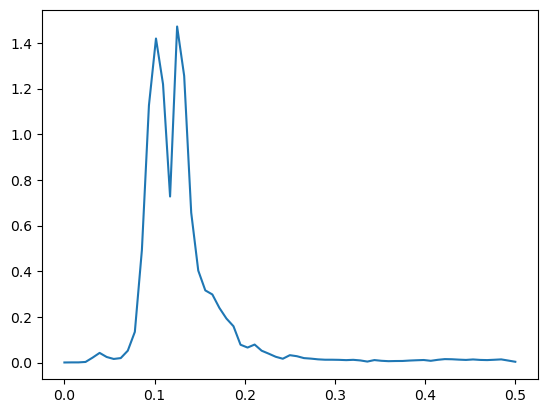

In [74]:
plt.plot(cc.index, cc.c11)